In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels import PanelOLS, RandomEffects
from linearmodels.panel import compare
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/ATerracol/P8Econ/master/data/Projet4_Groupe10.csv"
df = pd.read_csv(url)
df.head()

,state,year,region,pcap,hwy,water,util,pc,gsp,emp,unemp
0,ALABAMA,1970,6,15032.67,7325.80,1655.68,6051.20,35793.80,28418,1010.5,4.7
1,ALABAMA,1971,6,15501.94,7525.94,1721.02,6254.98,37299.91,29375,1021.9,5.2
2,ALABAMA,1972,6,15972.41,7765.42,1764.75,6442.23,38670.30,31303,1072.3,4.7
3,ALABAMA,1973,6,16406.26,7907.66,1742.41,6756.19,40084.01,33430,1135.5,3.9
4,ALABAMA,1974,6,16762.67,8025.52,1734.85,7002.29,42057.31,33749,1169.8,5.5


In [3]:
# Conversion des variables en logs.
df['log_pcap'] = np.log(df['pcap'])
df['log_hwy'] = np.log(df['hwy'])
df['log_pc'] = np.log(df['pc'])
df['log_emp'] = np.log(df['emp'])
df['log_gsp'] = np.log(df['gsp'])

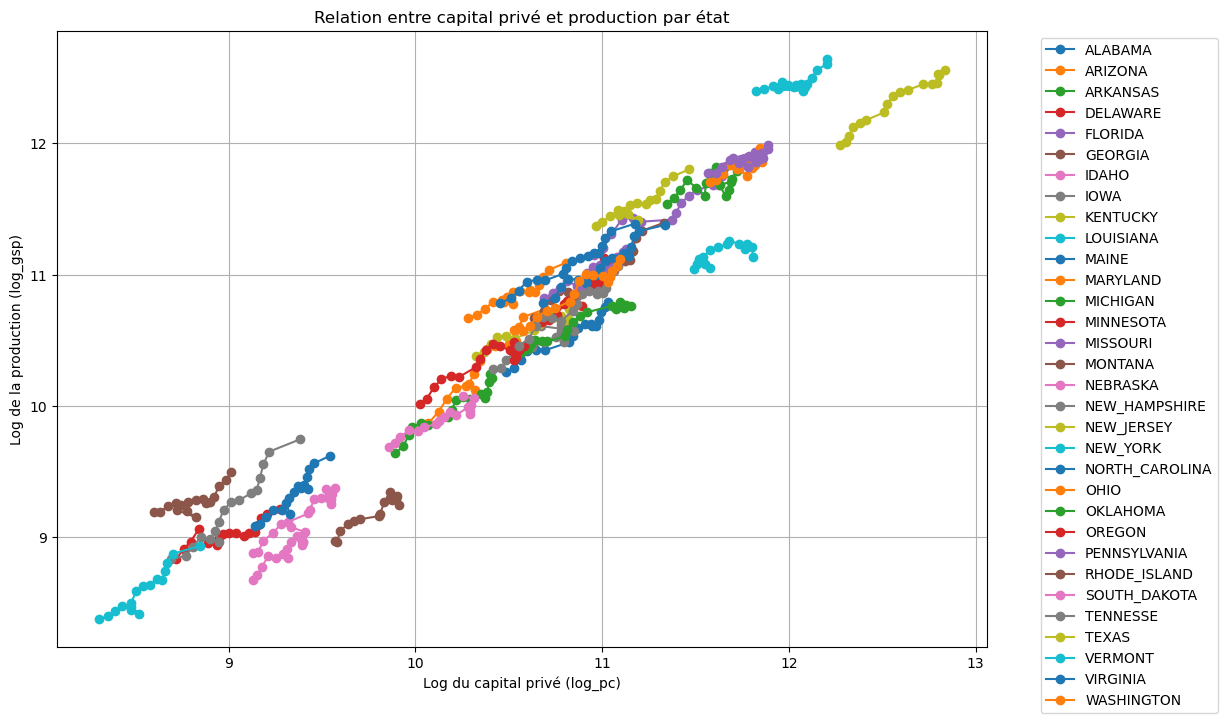

In [8]:
# Graphique log capital privé vs log production par état.
plt.figure(figsize=(12,8))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.plot(state_data['log_pc'], state_data['log_gsp'], marker='o', linestyle='-', label=state)

plt.xlabel('Log du capital privé (log_pc)')
plt.ylabel('Log de la production (log_gsp)')
plt.title('Relation entre capital privé et production par état')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

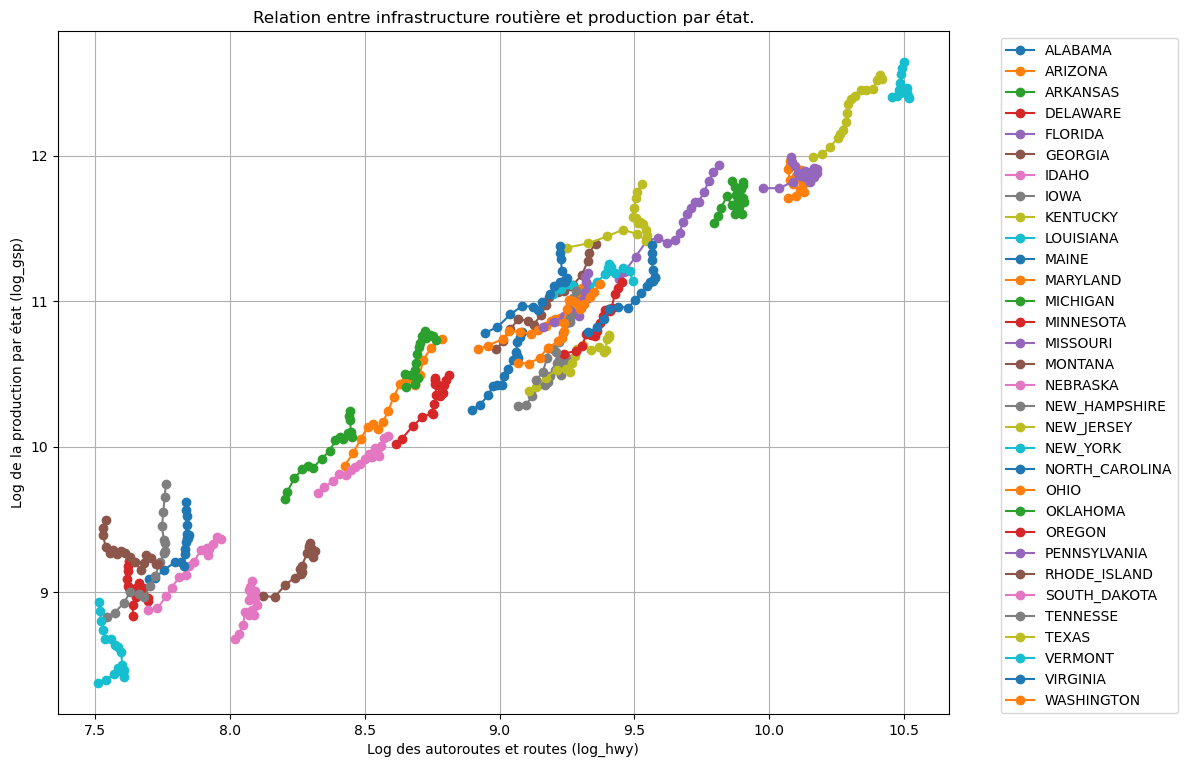

In [9]:
# Graphique log autoroutes vs log production par état
plt.figure(figsize=(12,8))
for state in df['state'].unique():
    state_data = df[df['state'] == state]
    plt.plot(state_data['log_hwy'], state_data['log_gsp'],
            marker='o',linestyle='-',label=state)

plt.xlabel('Log des autoroutes et routes (log_hwy)')
plt.ylabel('Log de la production par état (log_gsp)')
plt.title('Relation entre infrastructure routière et production par état.')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Préparation modèles de panel.
df_panel = df.set_index(['state','year'])

In [11]:
# Estimation des modèles.

def estimation_models(formula, data):
    # Estimations modèles à effets fixes et aléatoires puis test d'Hausman

    #E.F
    model_ef = PanelOLS.from_formula(formula, data=data).fit()

    #E.A
    model_ea = RandomEffects.from_formula(formula, data=data).fit()

    #Test d'Hausman
    hausman = compare({'Effets fixes':model_ef, 'Effets aléatoires':model_ea})

    return model_ef, model_ea, hausman

In [12]:
# Spécification 1: Modèle de base
formula1 = 'log_gsp ~ 1 + log_pc + log_emp + unemp'
ef1, ea1, hausman1 = estimation_models(formula1, df_panel)

In [13]:
# Spécification 2: Avec capital public total
formula2 = 'log_gsp ~ 1 + log_pc + log_emp + log_pcap + unemp'
ef2, ea2, hausman2 = estimation_models(formula2, df_panel)

In [14]:
# Spécification 3: Avec composante du capital public
formula3 = 'log_gsp ~ 1 + log_pc + log_emp + log_hwy + log(water) + log(util) + unemp'
ef3, ea3, hausman3 = estimation_models(formula3, df_panel)

In [28]:
# Résultat Spécification 1: Modèle de base
print(f"Effets fixes: {ef1.summary}")

Effets fixes:                           PanelOLS Estimation Summary                           
Dep. Variable:                log_gsp   R-squared:                        0.9943
Estimator:                   PanelOLS   R-squared (Between):              0.9955
No. Observations:                 544   R-squared (Within):               0.9361
Date:                Fri, Aug 29 2025   R-squared (Overall):              0.9943
Time:                        01:40:16   Log-likelihood                    613.82
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   3.114e+04
Entities:                          32   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                   F(3,540)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):          3.114e+04
              

In [23]:
print(f"Effets aléatoires: {ea1.summary}")

Effets aléatoires:                         RandomEffects Estimation Summary                        
Dep. Variable:                log_gsp   R-squared:                        0.9635
Estimator:              RandomEffects   R-squared (Between):              0.9952
No. Observations:                 544   R-squared (Within):               0.9396
Date:                Fri, Aug 29 2025   R-squared (Overall):              0.9940
Time:                        01:40:16   Log-likelihood                    1015.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4750.7
Entities:                          32   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                   F(3,540)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):             4750.7
         

In [24]:
print(f"Test d'Hausman: {hausman1.summary}")

Test d'Hausman:                   Model Comparison                  
                      Effets fixes Effets aléatoires
----------------------------------------------------
Dep. Variable              log_gsp           log_gsp
Estimator                 PanelOLS     RandomEffects
No. Observations               544               544
Cov. Est.               Unadjusted        Unadjusted
R-squared                   0.9943            0.9635
R-Squared (Within)          0.9361            0.9396
R-Squared (Between)         0.9955            0.9952
R-Squared (Overall)         0.9943            0.9940
F-statistic              3.114e+04            4750.7
P-value (F-stat)            0.0000            0.0000
===================== ============   ===============
Intercept                   2.0750            1.9720
                          (43.932)          (17.950)
log_pc                      0.3153            0.3261
                          (30.347)          (13.162)
log_emp                     0.

In [29]:
# Résultat Spécification 2: Avec capital public total.
print(f"Effets fixes: {ef2.summary}")

Effets fixes:                           PanelOLS Estimation Summary                           
Dep. Variable:                log_gsp   R-squared:                        0.9945
Estimator:                   PanelOLS   R-squared (Between):              0.9957
No. Observations:                 544   R-squared (Within):               0.9337
Date:                Fri, Aug 29 2025   R-squared (Overall):              0.9945
Time:                        01:41:52   Log-likelihood                    624.55
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   2.425e+04
Entities:                          32   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                   F(4,539)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):          2.425e+04
              

In [26]:
print(f"Effets aléatoires: {ea2.summary}")

Effets aléatoires:                         RandomEffects Estimation Summary                        
Dep. Variable:                log_gsp   R-squared:                        0.9639
Estimator:              RandomEffects   R-squared (Between):              0.9950
No. Observations:                 544   R-squared (Within):               0.9399
Date:                Fri, Aug 29 2025   R-squared (Overall):              0.9939
Time:                        01:41:52   Log-likelihood                    1016.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3600.0
Entities:                          32   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                   F(4,539)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):             3600.0
         

In [27]:
print(f"Test d'Hausman: {hausman2.summary}")

Test d'Hausman:                   Model Comparison                  
                      Effets fixes Effets aléatoires
----------------------------------------------------
Dep. Variable              log_gsp           log_gsp
Estimator                 PanelOLS     RandomEffects
No. Observations               544               544
Cov. Est.               Unadjusted        Unadjusted
R-squared                   0.9945            0.9639
R-Squared (Within)          0.9337            0.9399
R-Squared (Between)         0.9957            0.9950
R-Squared (Overall)         0.9945            0.9939
F-statistic              2.425e+04            3600.0
P-value (F-stat)            0.0000            0.0000
===================== ============   ===============
Intercept                   1.9134            2.1064
                          (33.037)          (13.774)
log_pc                      0.2906            0.3315
                          (25.276)          (13.232)
log_emp                     0.

In [30]:
# Résultat Spécification 3: Avec composantes du capital public
print(f"Effets fixes: {ef3.summary}")

Effets fixes:                           PanelOLS Estimation Summary                           
Dep. Variable:                log_gsp   R-squared:                        0.9948
Estimator:                   PanelOLS   R-squared (Between):              0.9959
No. Observations:                 544   R-squared (Within):               0.9383
Date:                Fri, Aug 29 2025   R-squared (Overall):              0.9948
Time:                        01:43:46   Log-likelihood                    638.78
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.698e+04
Entities:                          32   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                   F(6,537)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):          1.698e+04
              

In [31]:
print(f"Effets aléatoires: {ea3.summary}")

Effets aléatoires:                         RandomEffects Estimation Summary                        
Dep. Variable:                log_gsp   R-squared:                        0.9649
Estimator:              RandomEffects   R-squared (Between):              0.9944
No. Observations:                 544   R-squared (Within):               0.9448
Date:                Fri, Aug 29 2025   R-squared (Overall):              0.9934
Time:                        01:43:47   Log-likelihood                    1038.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2459.1
Entities:                          32   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                   F(6,537)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):             2459.1
         

In [32]:
print(f"Test d'Hausman: {hausman3.summary}")

Test d'Hausman:                   Model Comparison                  
                      Effets fixes Effets aléatoires
----------------------------------------------------
Dep. Variable              log_gsp           log_gsp
Estimator                 PanelOLS     RandomEffects
No. Observations               544               544
Cov. Est.               Unadjusted        Unadjusted
R-squared                   0.9948            0.9649
R-Squared (Within)          0.9383            0.9448
R-Squared (Between)         0.9959            0.9944
R-Squared (Overall)         0.9948            0.9934
F-statistic              1.698e+04            2459.1
P-value (F-stat)            0.0000            0.0000
===================== ============   ===============
Intercept                   2.1288            2.1365
                          (37.299)          (13.171)
log_pc                      0.3083            0.2751
                          (24.193)          (10.506)
log_emp                     0.